# Import

In [10]:
import pandas as pd
import numpy as np
import sklearn
from nltk import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Read Data

In [24]:
train_data = pd.read_csv('dataset/train_data.csv', index_col='id')
train_data['period'] = pd.to_datetime(train_data.period)

print('Columns:', len(train_data.columns))
print('Data Length:', len(train_data))
train_data.info()

Columns: 31
Data Length: 66125
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66125 entries, 1 to 66125
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   period      66125 non-null  datetime64[ns, UTC]
 1   game-ver    66125 non-null  object             
 2   lobby-mode  66125 non-null  object             
 3   lobby       66125 non-null  object             
 4   mode        66125 non-null  object             
 5   stage       66125 non-null  object             
 6   A1-weapon   66125 non-null  object             
 7   A1-rank     51681 non-null  object             
 8   A1-level    66125 non-null  int64              
 9   A2-weapon   66125 non-null  object             
 10  A2-rank     51681 non-null  object             
 11  A2-level    66125 non-null  float64            
 12  A3-weapon   66125 non-null  object             
 13  A3-rank     51681 non-null  object             
 14  A3-leve

# Columns Overview

## period

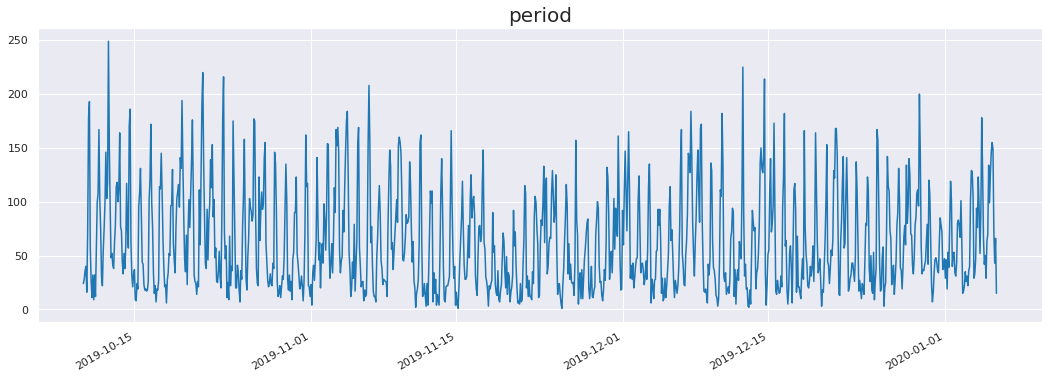

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1)
train_data['period'].value_counts().plot(figsize=(18, 6), axes=ax, colormap='tab20')
ax.set_title('period', fontsize=20)
fig.show()

## game-ver

In [45]:
train_data['game-ver'].value_counts()

5.0.1    66125
Name: game-ver, dtype: int64

## lobby-mode

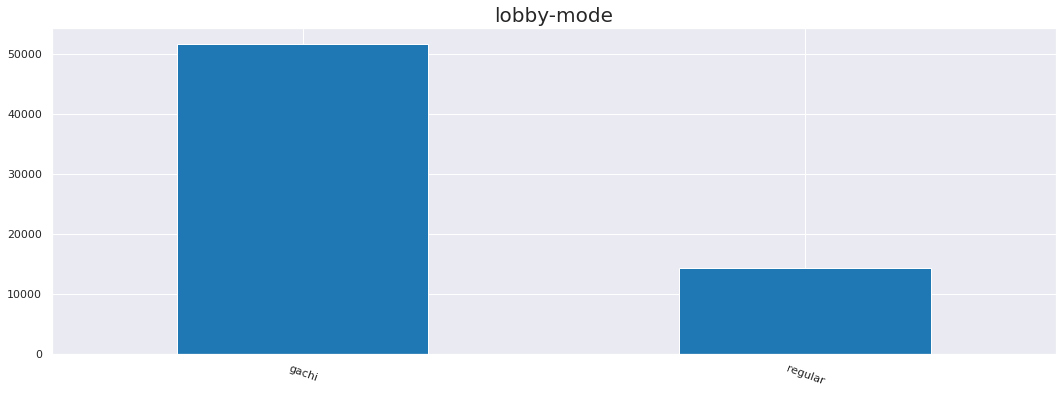

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1)
train_data['lobby-mode'].value_counts().plot(figsize=(18, 6), axes=ax, colormap='tab20', kind='bar', rot=-20)
ax.set_title('lobby-mode', fontsize=20)
fig.show()

## lobby

In [50]:
train_data['lobby'].value_counts()

standard    66125
Name: lobby, dtype: int64

## mode

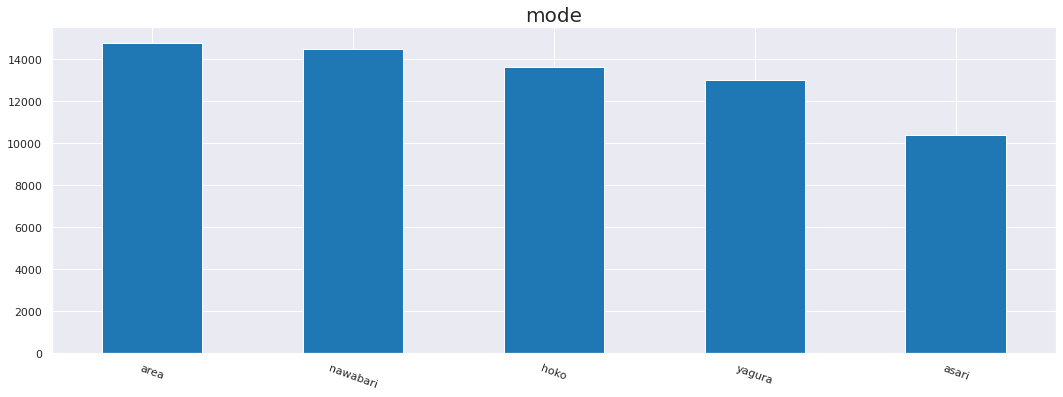

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1)
train_data['mode'].value_counts().plot(figsize=(18, 6), axes=ax, colormap='tab20', kind='bar', rot=-20)
ax.set_title('mode', fontsize=20)
fig.show()

## stage

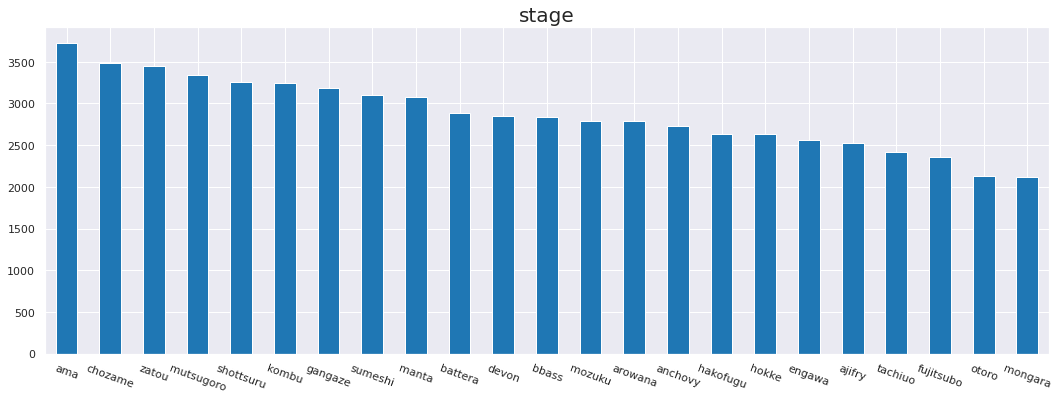

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1)
train_data['stage'].value_counts().plot(figsize=(18, 6), axes=ax, colormap='tab20', kind='bar', rot=-20)
ax.set_title('stage', fontsize=20)
fig.show()

## Team A Weapons

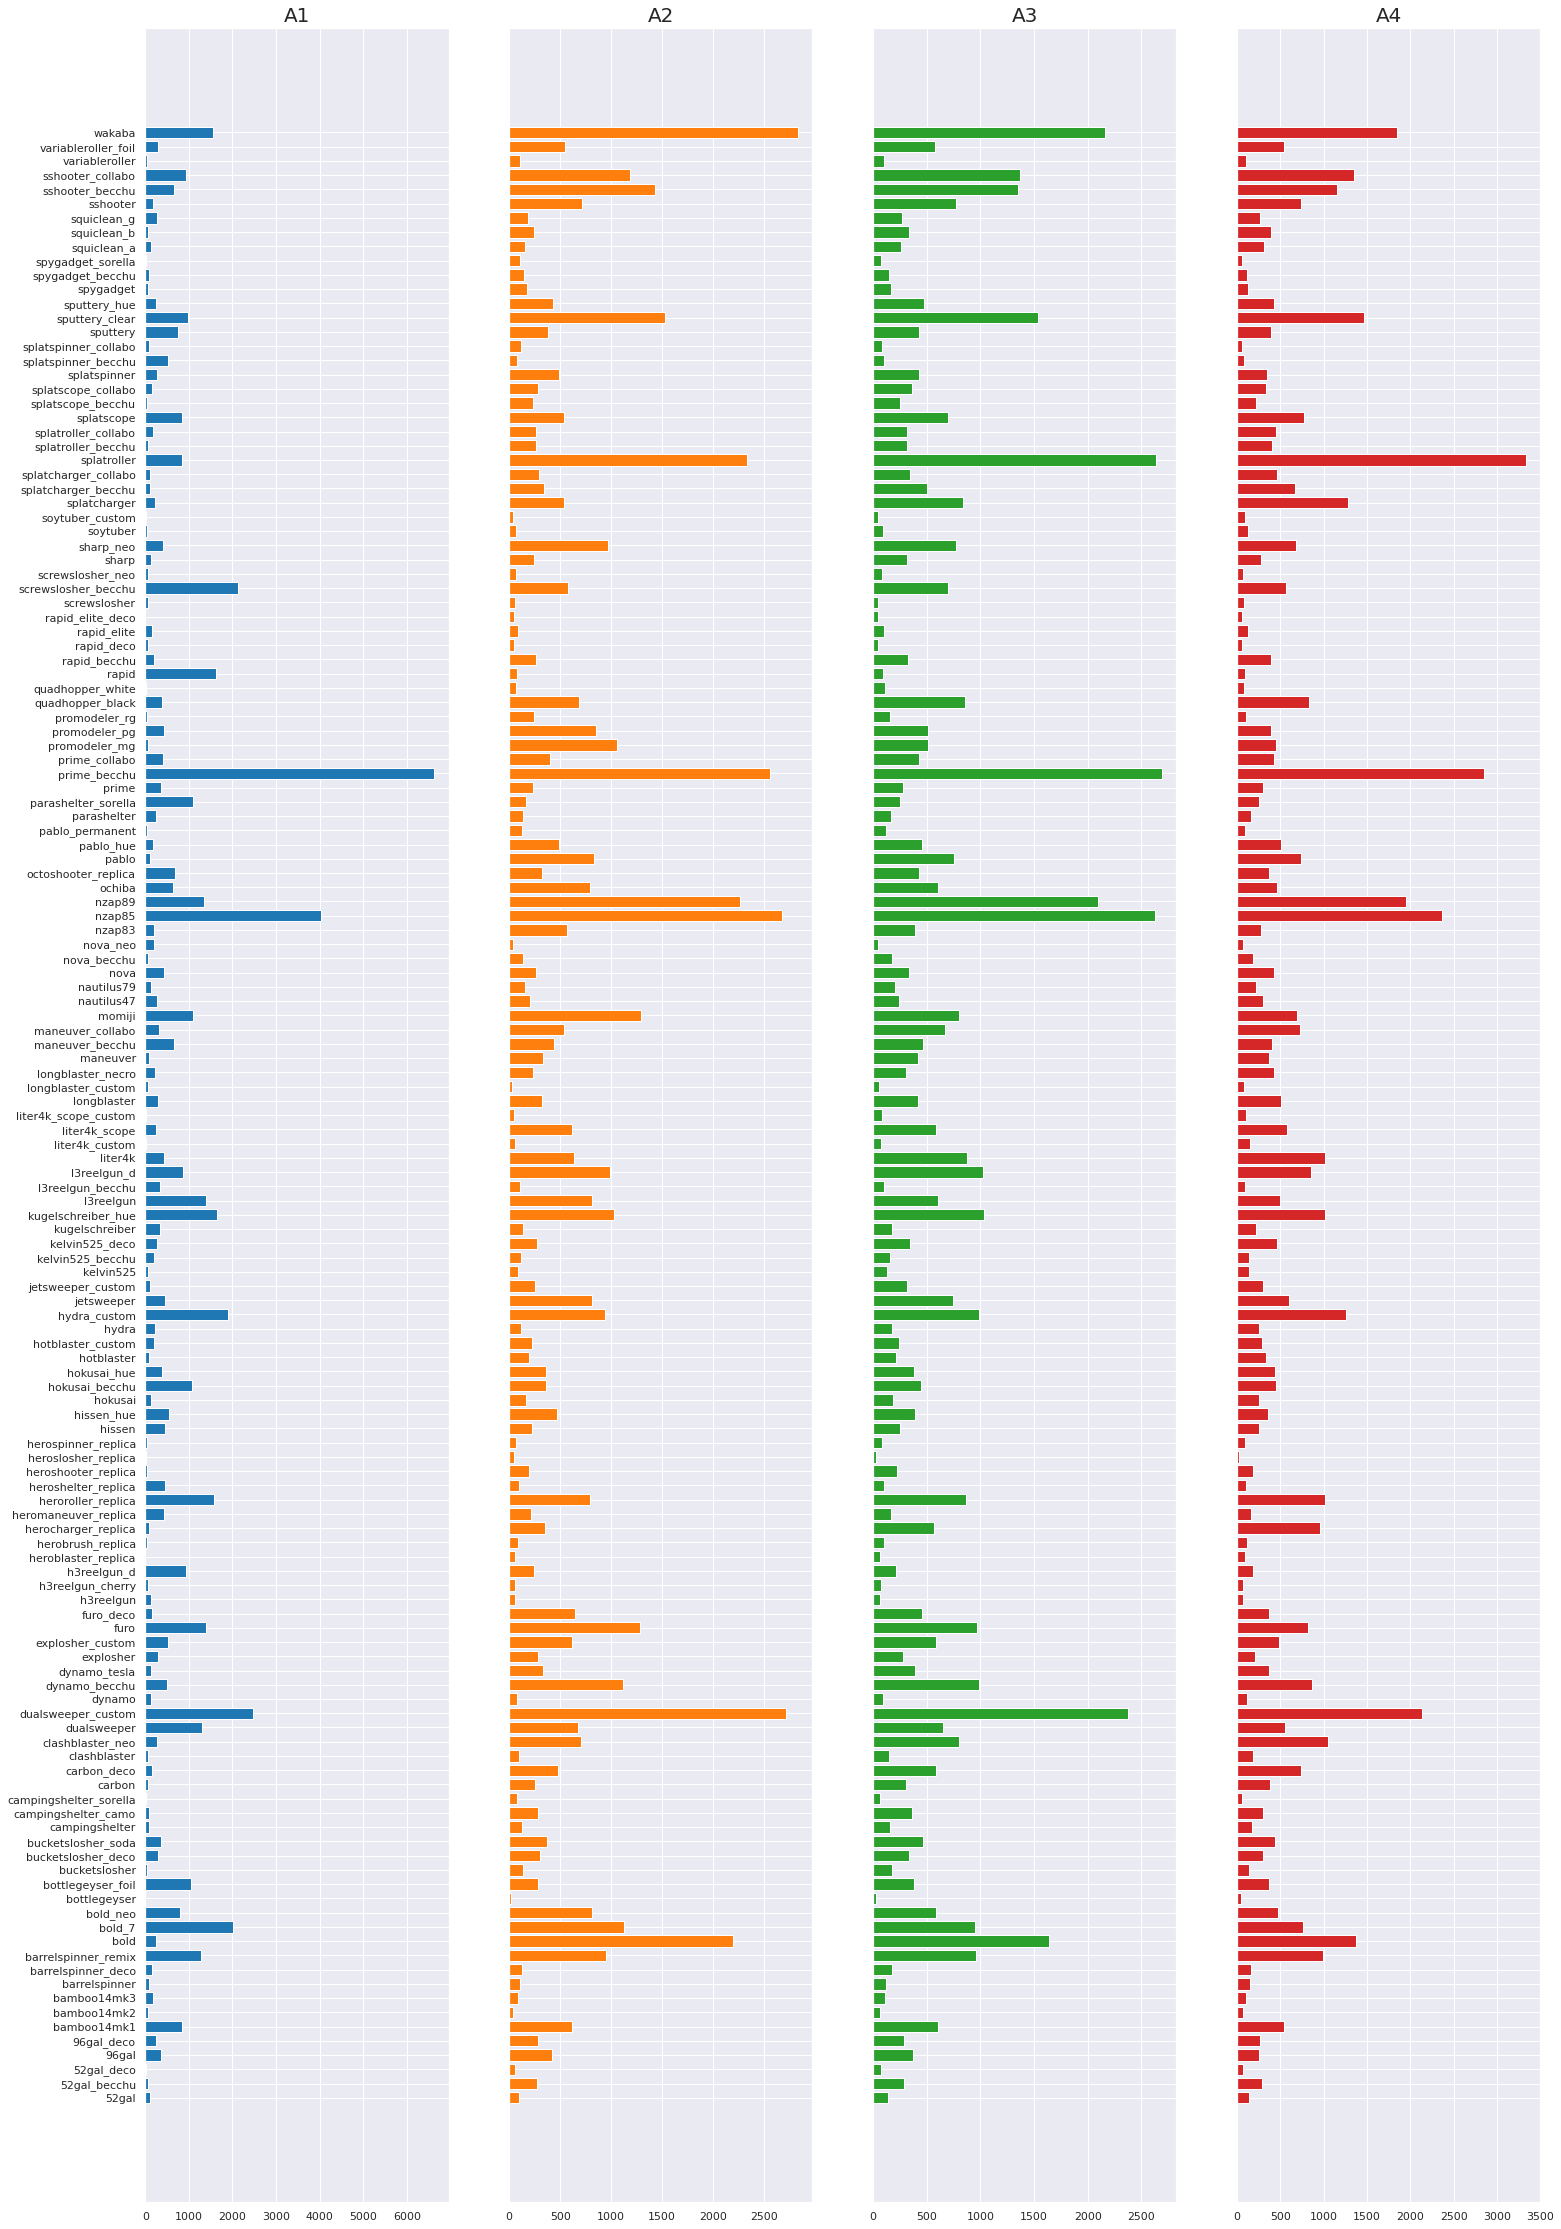

In [146]:
weapons_a1 = train_data['A1-weapon'].value_counts().sort_index()
weapons_a2 = train_data['A2-weapon'].value_counts().sort_index()
weapons_a3 = train_data['A3-weapon'].value_counts().sort_index()
weapons_a4 = train_data['A4-weapon'].value_counts().sort_index()

fig, axes = plt.subplots(figsize=(25, 40), ncols=4, sharey=True)
cm = plt.get_cmap('tab20')

weapons_a1 = weapons_a1
weapons_a2 = weapons_a2
weapons_a3 = weapons_a3
weapons_a4 = weapons_a4

axes[0].barh(weapons_a1.index.to_list(), weapons_a1, align='center', label='A1', color=cm(0))
axes[1].barh(weapons_a2.index.to_list(), weapons_a2, align='center', label='A2', color=cm(2))
axes[2].barh(weapons_a3.index.to_list(), weapons_a3, align='center', label='A3', color=cm(4))
axes[3].barh(weapons_a4.index.to_list(), weapons_a4, align='center', label='A4', color=cm(6))

axes[0].set_title('A1', fontsize=20)
axes[1].set_title('A2', fontsize=20)
axes[2].set_title('A3', fontsize=20)
axes[3].set_title('A4', fontsize=20)

fig.show()

## Team A Levels

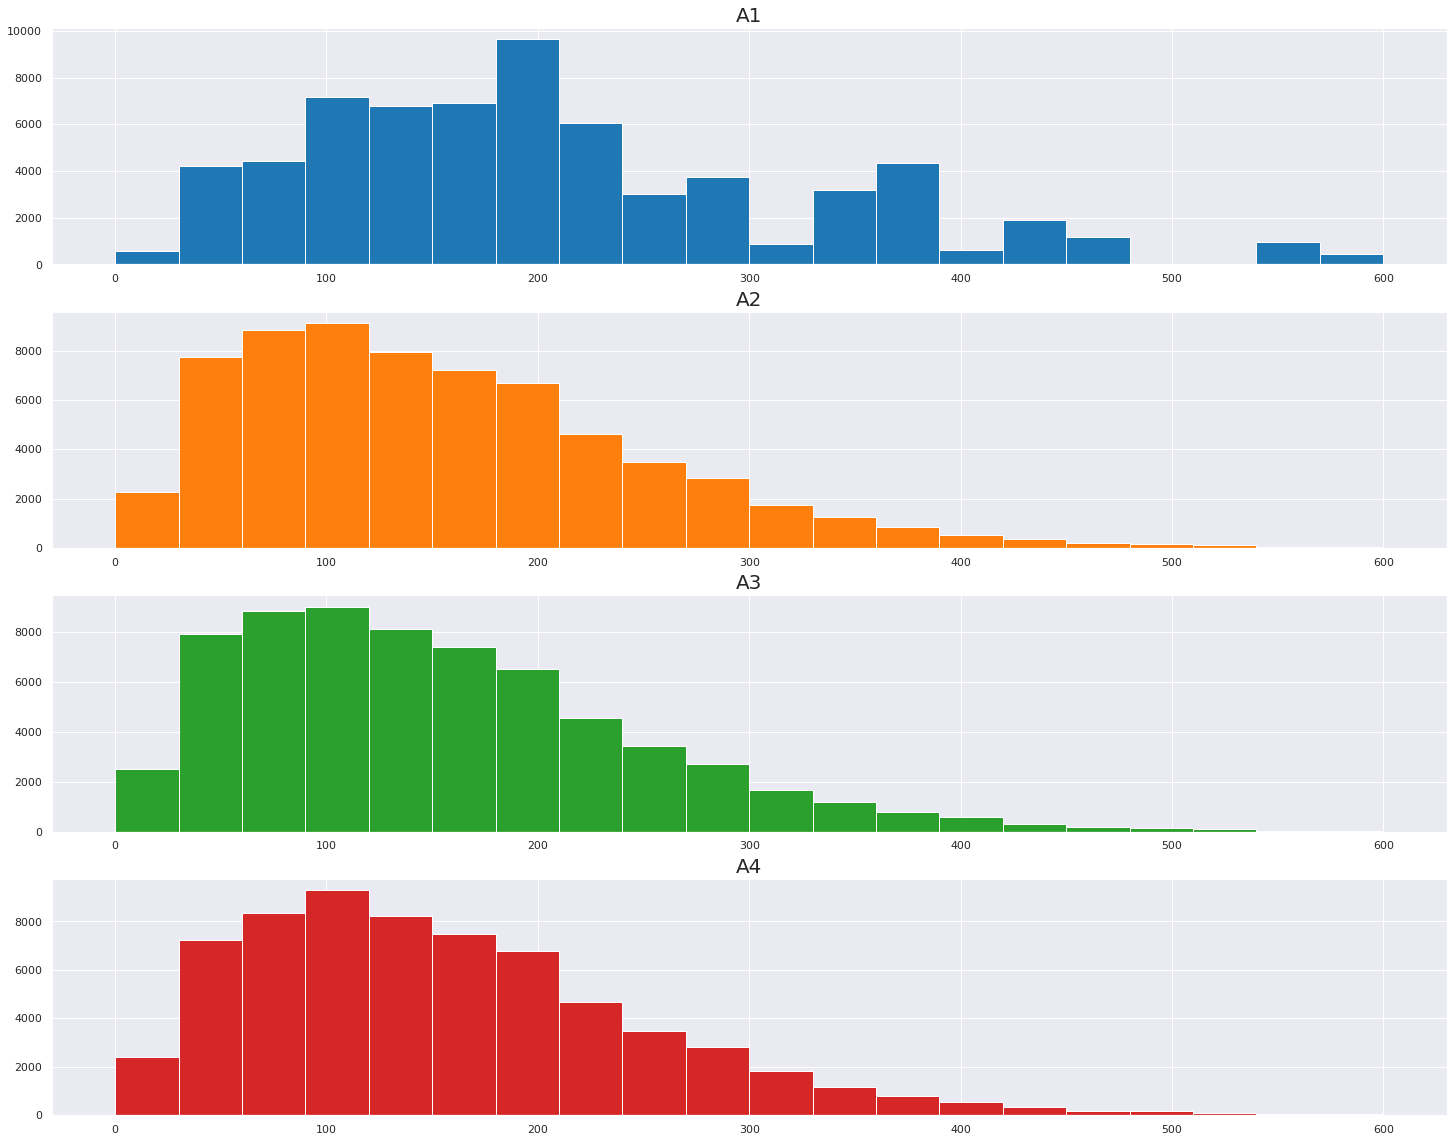

In [160]:
level_a1 = train_data['A1-level']
level_a2 = train_data['A2-level']
level_a3 = train_data['A3-level']
level_a4 = train_data['A4-level']

fig, axes = plt.subplots(figsize=(25, 20), nrows=4)
cm = plt.get_cmap('tab20')

axes[0].hist(level_a1, range=(0, 600), bins=20, color=cm(0))
axes[0].set_title('A1', fontsize=20)
axes[1].hist(level_a2, range=(0, 600), bins=20, color=cm(2))
axes[1].set_title('A2', fontsize=20)
axes[2].hist(level_a3, range=(0, 600), bins=20, color=cm(4))
axes[2].set_title('A3', fontsize=20)
axes[3].hist(level_a4, range=(0, 600), bins=20, color=cm(6))
axes[3].set_title('A4', fontsize=20)

fig.show()

## Team A Ranks

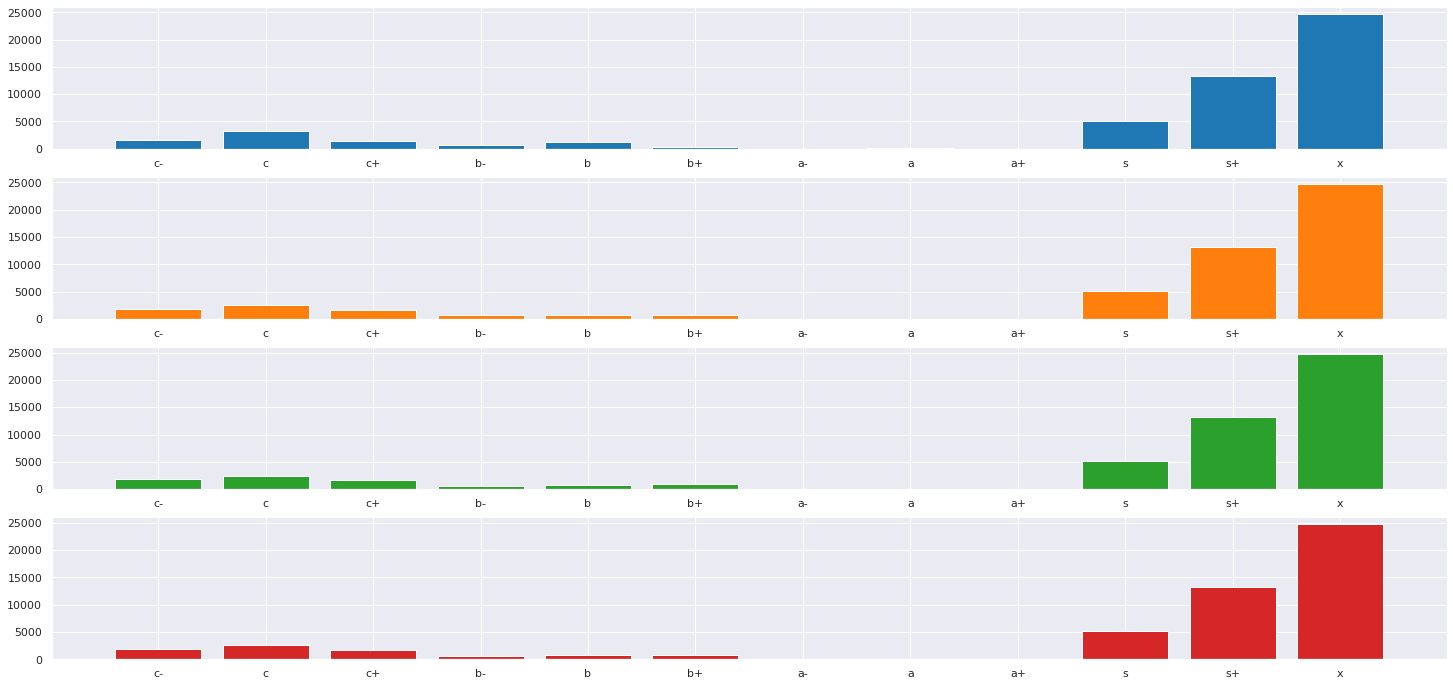

In [163]:
rank_a1 = train_data['A1-rank'].value_counts().sort_index()
rank_a2 = train_data['A2-rank'].value_counts().sort_index()
rank_a3 = train_data['A3-rank'].value_counts().sort_index()
rank_a4 = train_data['A4-rank'].value_counts().sort_index()

index = ['c-', 'c', 'c+', 'b-', 'b', 'b+', 'a-', 'a', 'a+', 's', 's+', 'x']
fig, ax = plt.subplots(figsize=(25, 12), nrows=4)
cm = plt.get_cmap('tab20')

ax[0].bar(index, rank_a1, color=cm(0))
ax[1].bar(index, rank_a2, color=cm(2))
ax[2].bar(index, rank_a3, color=cm(4))
ax[3].bar(index, rank_a4, color=cm(6))

fig.show()

## Team B Weapons

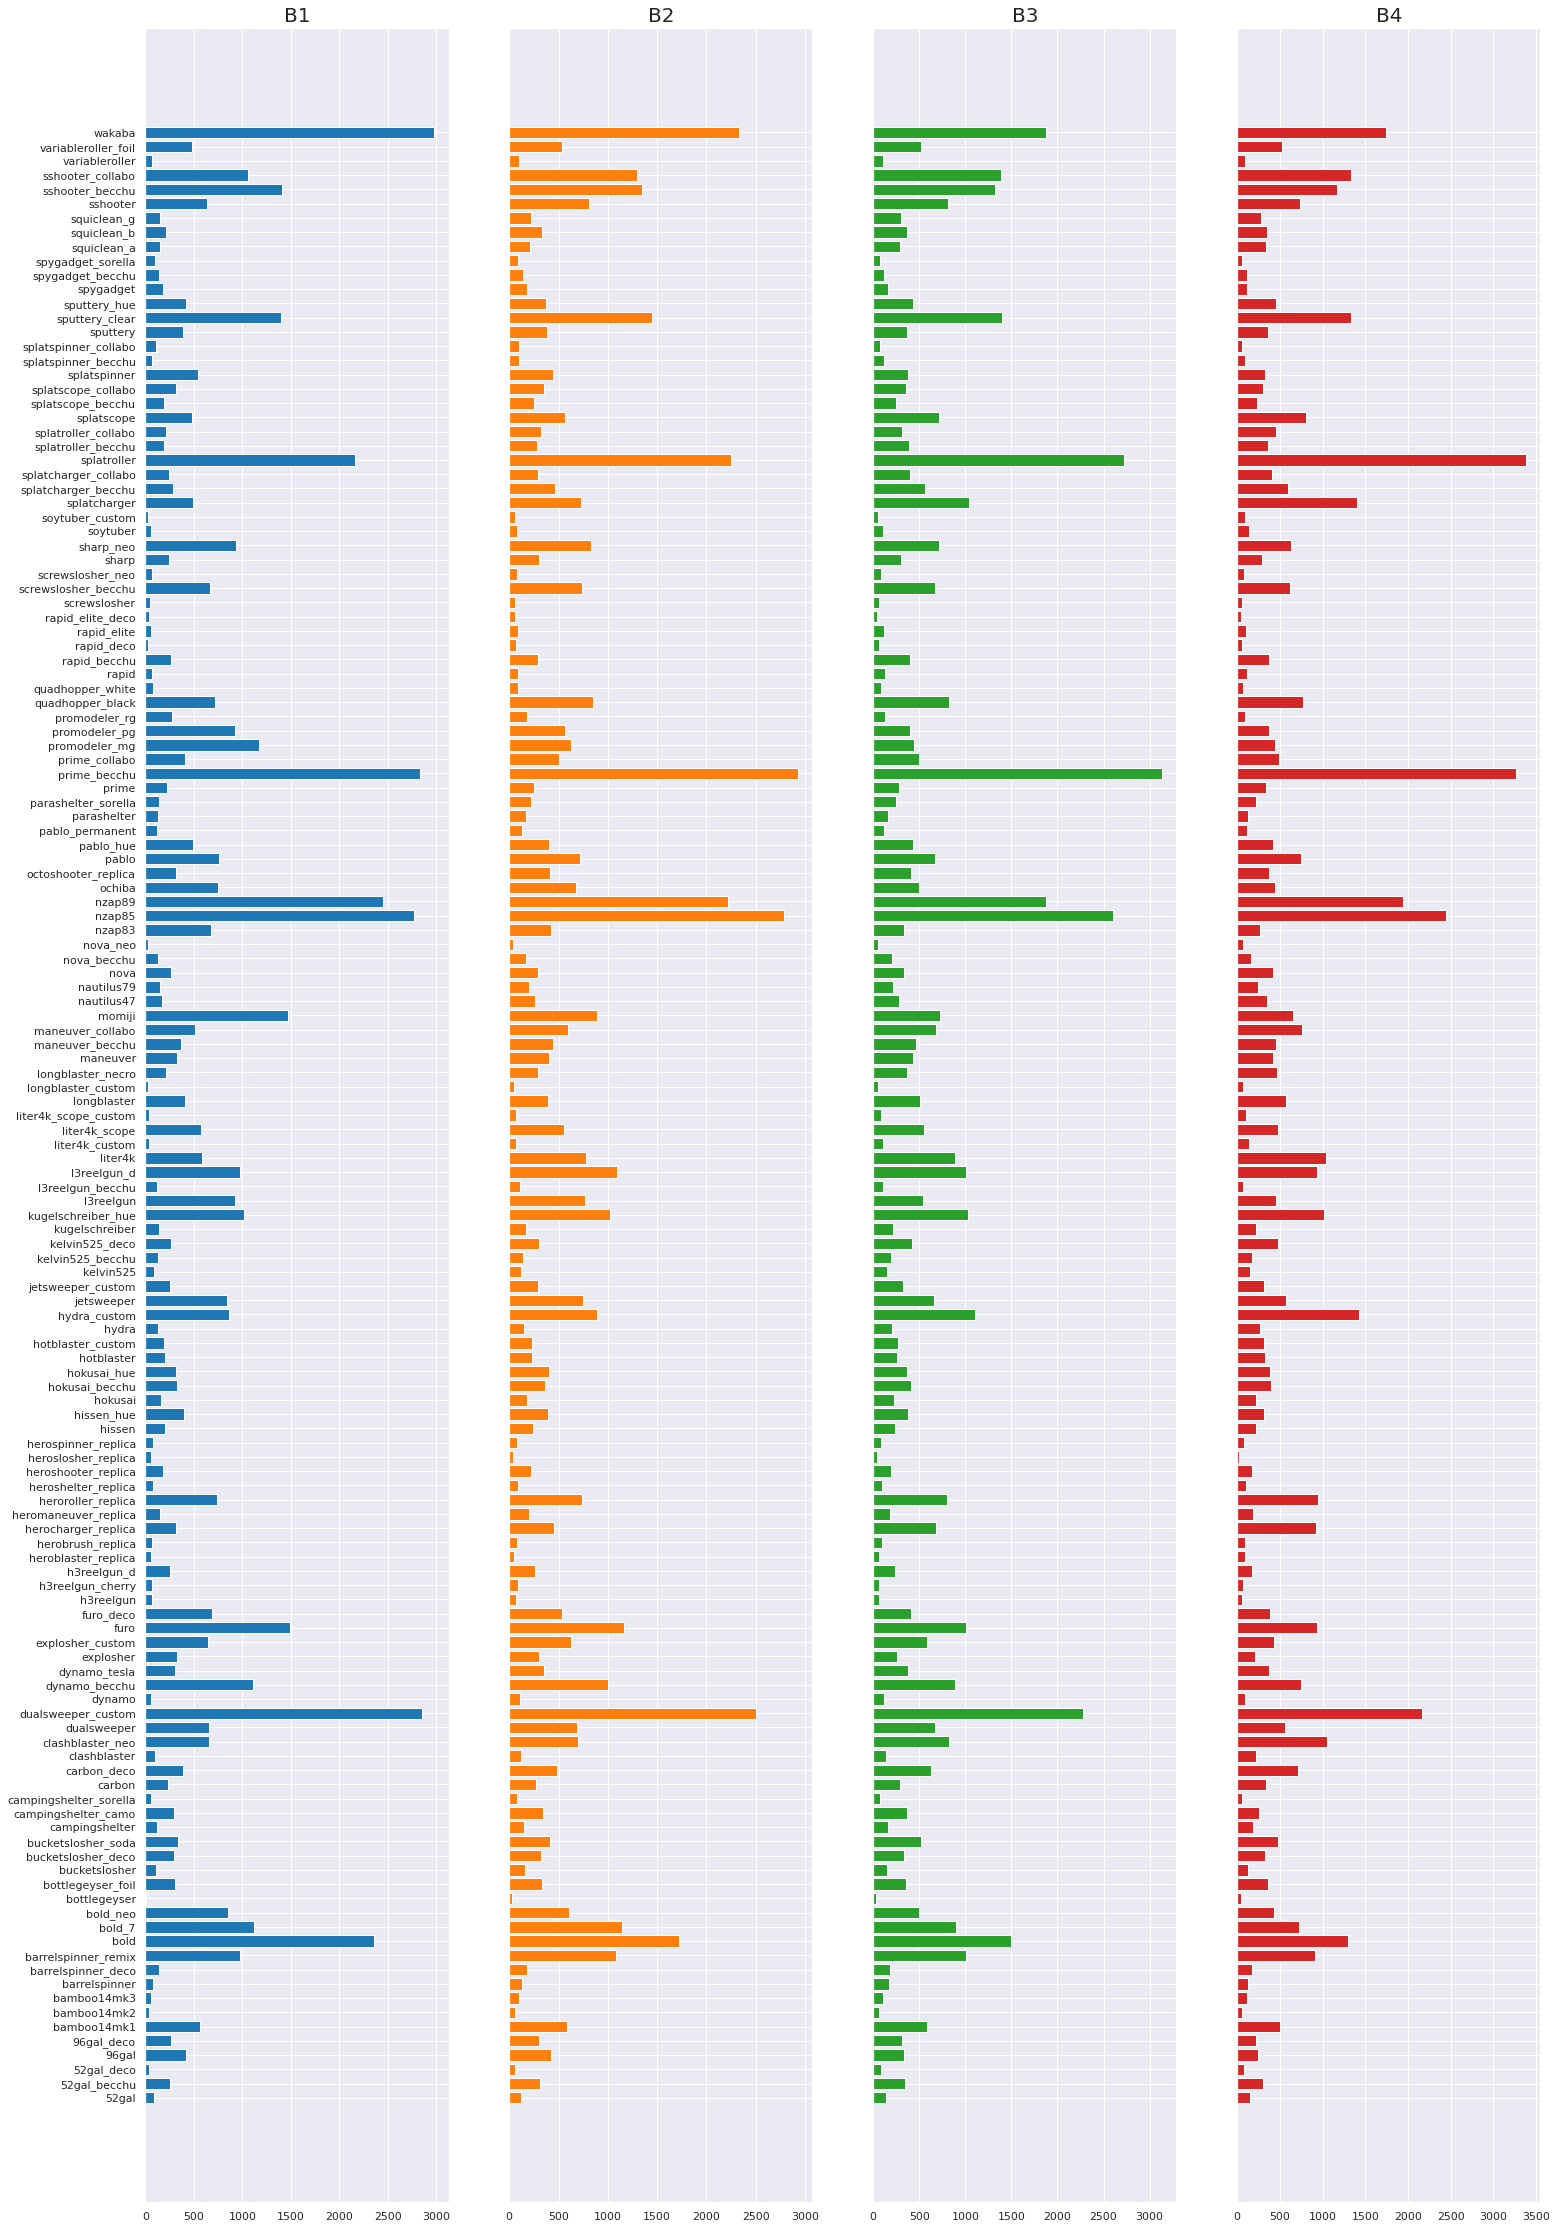

In [164]:
weapons_b1 = train_data['B1-weapon'].value_counts().sort_index()
weapons_b2 = train_data['B2-weapon'].value_counts().sort_index()
weapons_b3 = train_data['B3-weapon'].value_counts().sort_index()
weapons_b4 = train_data['B4-weapon'].value_counts().sort_index()

fig, axes = plt.subplots(figsize=(25, 40), ncols=4, sharey=True)
cm = plt.get_cmap('tab20')

weapons_b1 = weapons_b1
weapons_b2 = weapons_b2
weapons_b3 = weapons_b3
weapons_b4 = weapons_b4

axes[0].barh(weapons_b1.index.to_list(), weapons_b1, align='center', label='A1', color=cm(0))
axes[1].barh(weapons_b2.index.to_list(), weapons_b2, align='center', label='A2', color=cm(2))
axes[2].barh(weapons_b3.index.to_list(), weapons_b3, align='center', label='A3', color=cm(4))
axes[3].barh(weapons_b4.index.to_list(), weapons_b4, align='center', label='A4', color=cm(6))

axes[0].set_title('B1', fontsize=20)
axes[1].set_title('B2', fontsize=20)
axes[2].set_title('B3', fontsize=20)
axes[3].set_title('B4', fontsize=20)

fig.show()

## Team B Levels

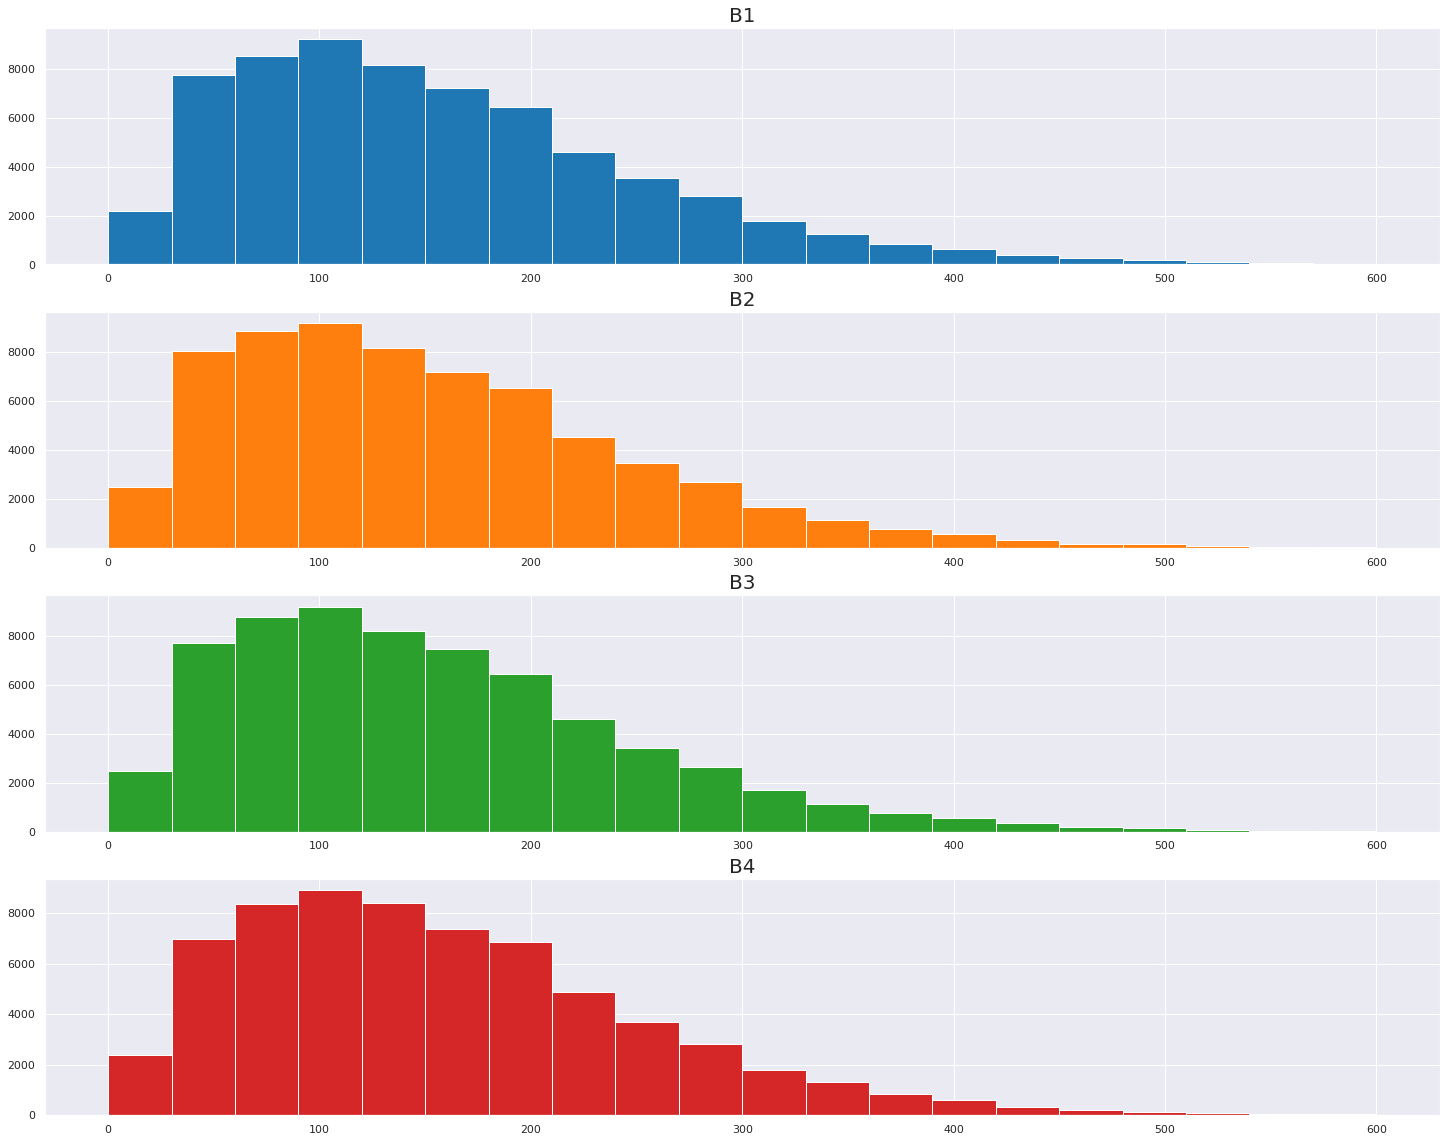

In [165]:
level_b1 = train_data['B1-level']
level_b2 = train_data['B2-level']
level_b3 = train_data['B3-level']
level_b4 = train_data['B4-level']

fig, axes = plt.subplots(figsize=(25, 20), nrows=4)
cm = plt.get_cmap('tab20')

axes[0].hist(level_b1, range=(0, 600), bins=20, color=cm(0))
axes[0].set_title('B1', fontsize=20)
axes[1].hist(level_b2, range=(0, 600), bins=20, color=cm(2))
axes[1].set_title('B2', fontsize=20)
axes[2].hist(level_b3, range=(0, 600), bins=20, color=cm(4))
axes[2].set_title('B3', fontsize=20)
axes[3].hist(level_b4, range=(0, 600), bins=20, color=cm(6))
axes[3].set_title('B4', fontsize=20)

fig.show()

## Team B Ranks

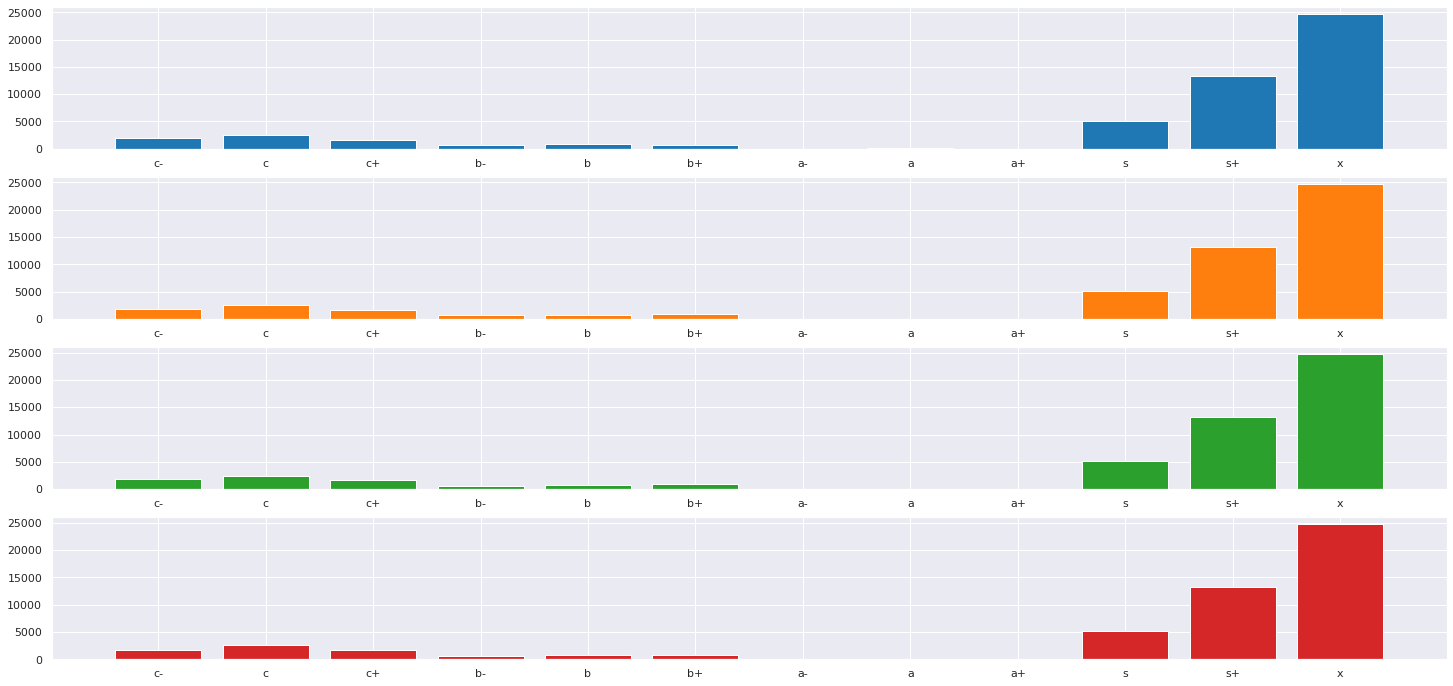

In [166]:
rank_b1 = train_data['B1-rank'].value_counts().sort_index()
rank_b2 = train_data['B2-rank'].value_counts().sort_index()
rank_b3 = train_data['B3-rank'].value_counts().sort_index()
rank_b4 = train_data['B4-rank'].value_counts().sort_index()

index = ['c-', 'c', 'c+', 'b-', 'b', 'b+', 'a-', 'a', 'a+', 's', 's+', 'x']
fig, ax = plt.subplots(figsize=(25, 12), nrows=4)
cm = plt.get_cmap('tab20')

ax[0].bar(index, rank_b1, color=cm(0))
ax[1].bar(index, rank_b2, color=cm(2))
ax[2].bar(index, rank_b3, color=cm(4))
ax[3].bar(index, rank_b4, color=cm(6))

fig.show()